<a href="https://colab.research.google.com/github/sarthak-314/Book-Recommender-System/blob/master/NeuMF%20Fusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NEU-MF FUSION**
****

In [ ]:
import pandas as pd
import os
%cd /content/drive/My\ Drive

/content/drive/My Drive


In [ ]:
DF_PATH = './Colab Notebooks/CADABRA/Recommender System/goodreads-10k'
ratings = pd.read_csv(os.path.join(DF_PATH, 'ratings.csv'))
book_tags = pd.read_csv(os.path.join(DF_PATH, 'book_tags.csv'))
tags = pd.read_csv(os.path.join(DF_PATH, 'tags.csv'))
books = pd.read_csv(os.path.join(DF_PATH, 'books.csv'))
book_tags = book_tags.merge(tags)

In [ ]:
import numpy as np
TOTAL_TAGS_COUNT = book_tags.groupby('tag_id')['count'].sum().sum()
grouped=book_tags.groupby('tag_id')['count'].sum()
def get_idf(id):
    count = grouped[id]
    return np.log(TOTAL_TAGS_COUNT/(count+25))
#TODO: Add hash table to make it fast
book_tags['idf'] = book_tags.tag_id.apply(get_idf)
book_tags.head()

,goodreads_book_id,tag_id,count,tag_name,idf
0,1,30574,167697,to-read,0.394859
1,2,30574,24549,to-read,0.394859
2,3,30574,496107,to-read,0.394859
3,5,30574,11909,to-read,0.394859
4,6,30574,298,to-read,0.394859


In [ ]:
#Helper functions
def get_tags_for_book(book_id):
    goodreads_book_id = int(books[books.book_id==book_id].goodreads_book_id)
    tags_for_book = book_tags[book_tags.goodreads_book_id==goodreads_book_id][['tag_id', 'count', 'idf']]
    return tags_for_book

def compare_books(tags_A, tags_B):
    merged = tags_A.merge(tags_B, on='tag_id')
    if merged.empty: 
        return 0
    try:
        common_tf = ((merged['count_x'] + merged['count_y']) * merged['idf_x']).sum()
        total_tf = (tags_A['count'] * tags_A['idf']).sum() + (tags_B['count']*tags_B['idf']).sum()
        similarity_index = common_tf / total_tf
        return similarity_index
    except: 
        return 0

def get_scores_with(book_id):
    tags_for_book = get_tags_for_book(book_id)
    def get_similarity_score(x):
        book_tags_x = get_tags_for_book(x.book_id)
        return compare_books(tags_for_book, book_tags_x)
    return books.apply(get_similarity_score, axis=1)


For the user-book compatibility, I see how similar is the given book to the books that the user rated. If the book is more similar to the books that were rated 5 star by the user

The values for like, did not like and hated are very similar for some reasogn

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


import xgboost as xgb
import lightgbm as lgb

In [ ]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [ ]:
X = ratings.head(100)

In [ ]:
def get_X(user_id, book_id)

In [ ]:
#similarity
X['loved_book'], X['liked_book'], X['did_not_like'] =

In [ ]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor(n_neighbors=1))])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('XGB Regressor', Pipeline([('XGB', xgb.XGBRegressor())])))
pipelines.append(('LGBM Regressor', Pipeline([('LGBM', lgb.LGBMRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=2, random_state=21)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NameError: ignored

In [ ]:
x = get_scores_with(1)

In [ ]:
def user_book_compatibility(user_id, book_id):
    books_rated = ratings[ratings.user_id==user_id]
    tags_for_book = get_tags_for_book(book_id)
    loved_books = books_rated[books_rated.rating==5].book_id.values
    liked_books = books_rated[books_rated.rating==4].book_id.values
    did_not_like = books_rated[books_rated.rating<4].book_id.values
    def get_total_score(array):
        total_score = np.sum([compare_books(get_tags_for_book(x), tags_for_book) for x in array]) / len(array)
        return total_score
    loved_books_score = get_total_score(loved_books)
    liked_books_score = get_total_score(liked_books)
    did_not_like_score = get_total_score(did_not_like)
    return [loved_books_score, liked_books_score, did_not_like_score]

![](https://miro.medium.com/max/1800/1*Tqk7Q2q7wsr6MLF8Xl-emg.png)




In [ ]:
import keras
from keras.models import Model
from keras.regularizers import l2
from keras import layers
from keras.losses import CategoricalCrossentropy

In [ ]:
EMBEDDING_DIM = 20
TOTAL_USERS = ratings.user_id.nunique()
TOTAL_BOOKS = ratings.user_id.nunique()

In [ ]:
user_book_compatibility(1, 2)

[0.567636437150976, 0.5439686632667707, 0.5631117732138254]

In [ ]:
user_input = keras.Input(shape=(1))
book_input = keras.Input(shape=(1))
book_rate_input = keras.Input(shape=(3,))

user_vector = layers.Embedding(TOTAL_USERS, EMBEDDING_DIM, embeddings_initializer='he_normal', embeddings_regularizer=l2(0.001))(user_input)
book_vector = layers.Embedding(TOTAL_BOOKS, EMBEDDING_DIM, embeddings_initializer='he_normal', embeddings_regularizer=l2(0.001))(book_input)
user_bias = layers.Embedding(TOTAL_USERS, 1)(user_input)
book_bias = layers.Embedding(TOTAL_BOOKS, 1)(book_input)
# boi = LinearBoi()(tf.cast(user_input, tf.int32), tf.cast(book_input, tf.int32))

user_book_dot = layers.Dot(1)([user_vector, book_vector])
x = user_book_dot + user_bias + book_bias
x = layers.Dense(8)(x)
x = layers.Dropout(0.5)(x)
x = keras.backend.sum(x, axis=1)

y = layers.Concatenate(1)([user_vector, book_vector])
y = keras.backend.sum(y, axis=1)
y = layers.Dense(8, activation='relu')(y)
y = layers.Dropout(0.5)(y)

z  =  layers.Concatenate(1)([x, y, book_rate_input])
z = layers.Dense(6)(z)
output = layers.Dense(3)(z)

In [ ]:
model = Model(inputs=[user_input, book_input, book_rate_input], outputs=output, name='ensemble_recommender')
model.summary()


Model: "ensemble_recommender"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 20)        1068480     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 20)        1068480     input_2[0][0]                    
_______________________________________________________________________________

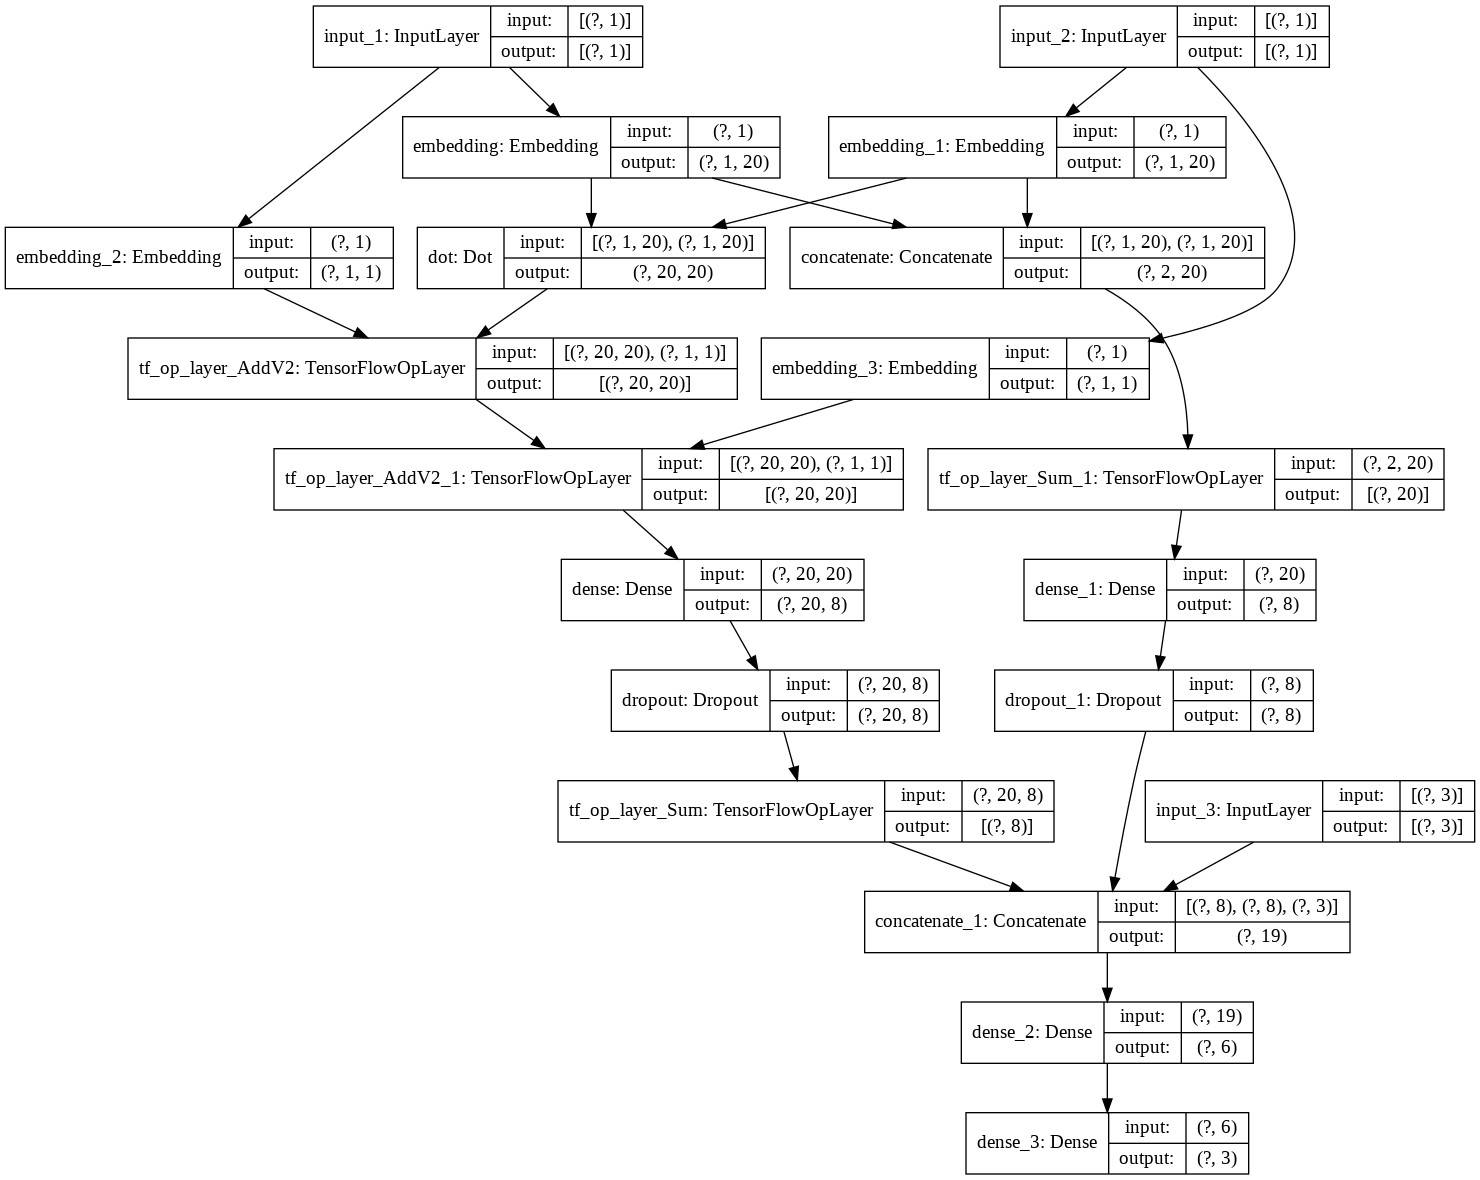

In [ ]:
model.compile(loss=CategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.Adam(lr=0.001))
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
class DataGenerator(keras.utils.Sequence):
    def __init__(self, ratings, batch_size=32):
        self.batch_size=batch_size
        self.user_ids = ratings.user_id.values
        self.book_ids = ratings.book_id.values
        self.ratings = ratings.rating

    def __len__(self):
        #Batches per epoch
        return len(self.user_ids) // self.batch_size
    
    #Generates one batch of data
    def __getitem__(self, batch_index): 
        indexes = list(range(batch_index*self.batch_size,(batch_index+1)*self.batch_size))
        users_one_hot = np.zeros((self.batch_size, TOTAL_USERS))
        #Hacky code
        books_one_hot = np.zeros((self.batch_size, TOTAL_BOOKS+1))
        #user_id = self.user_id[i] for i in indexes, user_id-1
        for e, idx in enumerate(indexes):
            user_id, book_id = self.user_ids[idx], self.book_ids[idx]
            # users_one_hot[e, user_id] = 1
            # books_one_hot[e, book_id] = 1
        one_hot_ratings = self.get_one_hot_ratings(indexes)
        lalaboi = user_book_compatibility(user_id, book_id)
        return [user_id, book_id, np.array(lalaboi)], one_hot_ratings
    def get_one_hot_ratings(self, indexes):
        ratings = self.ratings.iloc[indexes]
        a = (ratings == 5).astype(int)
        b = (ratings == 4).astype(int)
        c = (ratings < 4).astype(int)
        return np.stack([a, b, c], axis=-1)

In [ ]:
np.array([1, 2, 3]).shape

(3,)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(ratings, stratify=ratings.rating)

# training_generator = DataGenerator(train, batch_size=2048)
# validation_generator = DataGenerator(test, batch_size=2048)

In [ ]:
#TODO 
training_generator = DataGenerator(train.head(100), batch_size=2048)
validation_generator = DataGenerator(test.head(10), batch_size=2048)

In [ ]:
training_generator[0]

IndexError: ignored

In [ ]:
history = model.fit_generator(generator=training_generator, epochs=1, validation_data=validation_generator)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "test"])
plt.show()

In [ ]:
output = output = 

In [ ]:
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [ ]:
np.concatenate(([0], [1, 2, 3]))

array([0, 1, 2, 3])

In [ ]:
#To find similarity between id1 and id2, book_similarity[id1][id2]
book_similarity = {}
for id1 in range(1, TOTAL_BOOKS + 1):
    book_similarity[id1] = np.concatenate([0], get_scores_with(id1).values])

book_similarity

SyntaxError: ignored